In [2]:
# Importing Libraries

import pandas as pd #Dataframe analyses
import seaborn as sns #Visualization
import matplotlib.pyplot as plt #Visualization
from matplotlib.image import imread #Visualization

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix 

# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Column names from our csv file.

col_names = ['image_name', 'cat', 'torso_left_shoulder_right_shoulder', 'left_shoulder-left_wrist(11-15)'
, 'right_shoulder-right_elbow(12-14)', 'right_shoulder-right_ankle(12-28)'
,'right_elbow-right_wrist(14-16)', 'left_wrist-right_wrist(15-16)'
, 'left_wrist-left_hip(15-23)', 'left_wrist-left_ankle(15-27)'
, 'left_hip-right_hip(23-24)', 'left_hip-left_ankle(23-27)'
, 'right_hip-right_knee(24-26)', 'right_knee-right_ankle(26-28)'
,'left_ankle-right_ankle(27-28)', 'left_hip-left_knee(23-25)', 'left_knee-left_ankle(25-27)'
, 'left_shoulder-left_elbow(11-13)', 'left_elbow-left_wrist(13-15)'
, 'right_hip-right_ankle(24-28)', 'right_shoulder-right_wrist(12-16)']

In [4]:
# Reading CSV file.

df = pd.read_csv('goodmorning_land_dist.csv', names=col_names)
df.iloc[:,2:] = df.iloc[:,2:].div(df.torso_left_shoulder_right_shoulder, axis=0)
data=df

In [5]:
data.head(1000)

,image_name,cat,torso_left_shoulder_right_shoulder,left_shoulder-left_wrist(11-15),right_shoulder-right_elbow(12-14),right_shoulder-right_ankle(12-28),right_elbow-right_wrist(14-16),left_wrist-right_wrist(15-16),left_wrist-left_hip(15-23),left_wrist-left_ankle(15-27),...,left_hip-left_ankle(23-27),right_hip-right_knee(24-26),right_knee-right_ankle(26-28),left_ankle-right_ankle(27-28),left_hip-left_knee(23-25),left_knee-left_ankle(25-27),left_shoulder-left_elbow(11-13),left_elbow-left_wrist(13-15),right_hip-right_ankle(24-28),right_shoulder-right_wrist(12-16)
0,out-1095.jpg,0,1.0,0.712743,0.826753,2.879715,0.449210,0.663959,0.280538,2.223329,...,1.949079,0.883861,1.034984,0.744330,0.849219,1.107278,0.768859,0.317706,1.917739,0.678496
1,out-1096.jpg,0,1.0,0.710739,0.841505,2.819198,0.452704,0.651502,0.258377,2.197977,...,1.941056,0.866685,1.028318,0.733940,0.846689,1.102826,0.770908,0.354304,1.892858,0.661886
2,out-1097.jpg,0,1.0,0.714254,0.836625,2.811726,0.444907,0.662326,0.270769,2.185400,...,1.917360,0.847235,1.032812,0.749893,0.814548,1.109236,0.774233,0.349664,1.879080,0.665425
3,out-1098.jpg,0,1.0,0.718666,0.856821,2.865749,0.448022,0.644867,0.269710,2.202423,...,1.933175,0.881026,1.042922,0.743335,0.836267,1.103027,0.792705,0.390078,1.921488,0.674267
4,out-1099.jpg,0,1.0,0.680121,0.830808,2.713805,0.472010,0.634468,0.228516,2.127535,...,1.900247,0.856805,0.989090,0.754647,0.819956,1.084602,0.743557,0.356827,1.844651,0.662325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,out-2384.jpg,1,1.0,0.379715,0.820977,3.837072,0.569748,0.735872,1.149539,3.636926,...,2.488544,1.170193,1.208021,0.831785,1.233589,1.255207,0.781127,0.579071,2.377361,0.305467
996,out-2385.jpg,1,1.0,0.382995,0.817351,3.872961,0.592254,0.683564,1.174772,3.680794,...,2.506386,1.183531,1.238882,0.757621,1.231700,1.275216,0.775225,0.596330,2.420605,0.293334
997,out-2386.jpg,1,1.0,0.341412,0.823357,4.016639,0.594352,0.693184,1.266899,3.886089,...,2.619244,1.250387,1.276249,0.799621,1.301934,1.317625,0.762024,0.657436,2.526382,0.279898
998,out-2387.jpg,1,1.0,0.344626,0.832091,3.970921,0.593827,0.698297,1.319110,3.862765,...,2.543774,1.244093,1.246916,0.779123,1.271847,1.272608,0.767908,0.719860,2.490881,0.258500


In [6]:
data.cat.value_counts()

1    774
0    561
Name: cat, dtype: int64

<AxesSubplot:xlabel='cat', ylabel='count'>

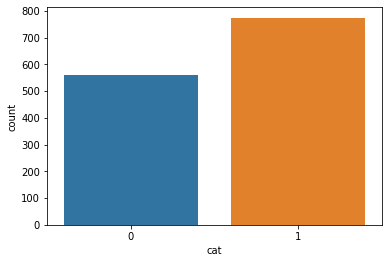

In [7]:
#Visulising the categorical data.

sns.countplot(data['cat'])

In [8]:
# Preparing dataset for train-test split. 

y=data.cat
x=data.drop(["cat"], axis=1)
x.drop(['torso_left_shoulder_right_shoulder'], axis=1, inplace=True)
columns=x.columns.tolist()

In [10]:
# Train - Test Split.

test_size=0.3
X_train, X_test, Y_train, Y_test=train_test_split(x, y, test_size=test_size, random_state=42, stratify=y)

In [11]:
Y_train.value_counts()

1    542
0    392
Name: cat, dtype: int64

In [12]:
# We append image names to an array for testing.

X_test_image_names=[]

for i in range(len(X_test)):
    X_test_image_names.append(X_test.iloc[i]['image_name'])

In [13]:
# We should drop image name before training the model.

X_train.drop(["image_name"], inplace=True, axis=1)
X_test.drop(["image_name"], inplace=True, axis=1)

In [14]:
# Training our model.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model = Sequential([
        Flatten(input_shape=(18,)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

In [15]:
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

In [16]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = model.fit(
    X_train, 
    Y_train, 
    epochs=50,
    validation_split=0.2, 
    batch_size=2, 
    verbose=2,
    callbacks=[callback]
)


Epoch 1/50
374/374 - 1s - loss: 0.2623 - accuracy: 0.8822 - val_loss: 0.0485 - val_accuracy: 0.9947 - 1s/epoch - 3ms/step
Epoch 2/50
374/374 - 0s - loss: 0.0414 - accuracy: 0.9893 - val_loss: 0.0146 - val_accuracy: 0.9947 - 487ms/epoch - 1ms/step
Epoch 3/50
374/374 - 0s - loss: 0.0229 - accuracy: 0.9946 - val_loss: 0.0090 - val_accuracy: 1.0000 - 453ms/epoch - 1ms/step
Epoch 4/50
374/374 - 1s - loss: 0.0127 - accuracy: 0.9973 - val_loss: 0.0050 - val_accuracy: 1.0000 - 504ms/epoch - 1ms/step
Epoch 5/50
374/374 - 0s - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000 - 491ms/epoch - 1ms/step
Epoch 6/50
374/374 - 0s - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000 - 436ms/epoch - 1ms/step
Epoch 7/50
374/374 - 0s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 8.6902e-04 - val_accuracy: 1.0000 - 465ms/epoch - 1ms/step
Epoch 8/50
374/374 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 6.7908e-04 - val_accuracy: 1.0000 - 456ms/epoch - 1ms/

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


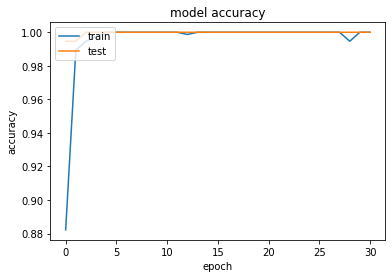

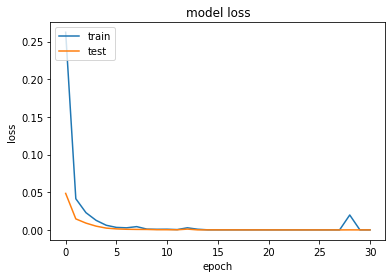

In [17]:
# Model accuracy graphs.

print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
# Prediction.

y_pred = model.predict(X_test)
y_pred = list(map(lambda x: 0 if x <=0.5 else 1 ,y_pred))

In [19]:
cm=confusion_matrix(Y_test,y_pred)
acc=accuracy_score(Y_test,y_pred)
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

13/13 [==============================] - 0s 897us/step - loss: 1.9807e-05 - accuracy: 1.0000
Test accuracy: 1.0


In [20]:
# Results.

print("CM: ",cm)
print("Model Accuracy: ",acc)

CM:  [[169   0]
 [  0 232]]
Model Accuracy:  1.0


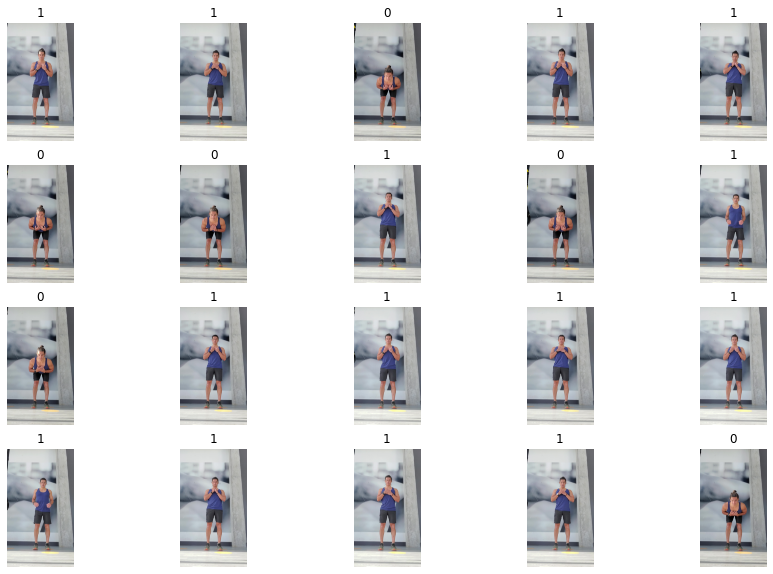

In [21]:
# Showing some prediction results with images.

folder = 'Images/'     
fig, ax = plt.subplots(figsize=(15, 10))

for i in range(20):
    plt.subplot(4,5, i+1)
    plt.title(y_pred[i])
    
    image = imread(folder + X_test_image_names[i])
    plt.axis('off')
    plt.imshow(image)

In [22]:
# Creating tflite model.

converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [23]:
tflite_model = converter.convert()
with open('goodmorning_model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/hp/q6tsp3js6wzb39zvpvqfchw00000gn/T/tmp5vmpbwgv/assets
